In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Using TensorFlow backend.


---------------------------------------------------------------------
10
        EQE
0       0.4
1       0.4
2       0.4
3       0.4
4       0.3
...     ...
524535  0.4
524536  0.4
524537  0.4
524538  0.4
524539  0.4

[524540 rows x 1 columns]


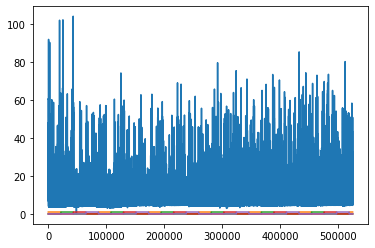





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 351441 samples, validate on 173099 samples
Epoch 1/10





 - 18s - loss: 0.0267 - val_loss: 0.0224
Epoch 2/10
 - 16s - loss: 0.0148 - val_loss: 0.0199
Epoch 3/10
 - 16s - loss: 0.0147 - val_loss: 0.0202
Epoch 4/10
 - 16s - loss: 0.0146 - val_loss: 0.0169
Epoch 5/10
 - 16s - loss: 0.0147 - val_loss: 0.0223
Epoch 6/10
 - 16s - loss: 0.0147 - val_loss: 0.0220
Epoch 7/10
 - 16s - loss: 0.0145 - val_loss: 0.0153
Epoch 8/10
 - 16s - loss: 0.0146 - val_loss: 0.0168
Epoch 9/10
 - 17s - loss: 0.0146 - val_loss: 0.0162
Epoch 10/10
 - 17s - loss: 0.0145 - val_loss: 0.0157


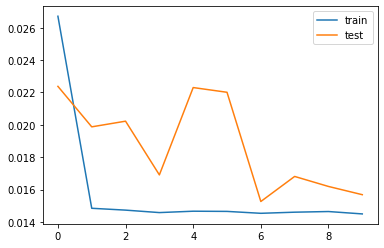

(173099, 1, 5)


In [2]:
from numpy import array
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
 

df1 = pd.read_csv("/content/gdrive/My Drive/ampds/data/data.csv")
from sklearn.model_selection import train_test_split
import tensorflow as tf

X=df1.iloc[:524540,1:2]
for j in range(10,11):
  print("---------------------------------------------------------------------")
  print(j)
  y=df1.iloc[:524540,j:j+1]
  print(y)
  l=[]
  for i in range(0,524540):
    chk=i%86400
    if(chk<21600):
      l.append(0)
    elif (21600<=chk<43200):
      l.append(1)
    elif (43200<=chk<64800):
      l.append(2)
    else:
      l.append(3)
  encoded = to_categorical(l)
  dataset = pd.DataFrame({'N': encoded[:, 0], 'M': encoded[:, 1], 'A': encoded[:, 2], 'E': encoded[:, 3]})
  # print(dataset.head())

  df = pd.concat([X, dataset], axis=1)
  # print(df.head())
  import matplotlib.pyplot as plt
  plt.plot(df)
  plt.show()

  dataset = df.values
  dataset = df.astype('float32')
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset)
  # print (dataset)

  # split into train and test sets
  train_size = int(len(dataset) * 0.67)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
  # print(len(train), len(test))
  train = train.reshape((train.shape[0], 1, train.shape[1]))
  test = test.reshape((test.shape[0], 1, test.shape[1]))
  # print(train.shape)

  datay = y.values
  datay = y.astype('float32')
  scaler = MinMaxScaler(feature_range=(0, 1))
  datay = scaler.fit_transform(datay)
  # print (datay)

  trainy_size = int(len(datay) * 0.67)
  testy_size = len(datay) - trainy_size
  trainy, testy = datay[0:trainy_size,:], datay[trainy_size:len(datay),:]
  # print(len(trainy), len(testy))
  # trainy = trainy.reshape((trainy.shape[0], 1, trainy.shape[1]))
  # testy = testy.reshape((testy.shape[0], 1, testy.shape[1]))
  # print(trainy.shape)

  testy = pd.DataFrame(testy, columns=['testy'])
  testy.to_csv('rnn-lstm-test'+str(j)+'.csv') 

    
  # design network
  model = Sequential()
  model.add(LSTM(50, input_shape=(train.shape[1], train.shape[2])))
  model.add(Dense(1))
  model.compile(loss='mae', optimizer='adam')
  # fit network
  history = model.fit(train, trainy, epochs=10, batch_size=72, validation_data=(test, testy), verbose=2, shuffle=False)
  # plot history

  from matplotlib import pyplot
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.show()

  from math import sqrt
  from numpy import concatenate
  print(test.shape)
  # test = test.reshape((test.shape[0], 1, test.shape[1]))
  # make a prediction
  yhat = model.predict(test)
  yhat = pd.DataFrame(yhat, columns=['yhat'])
  yhat.to_csv('rnn-lstm-predict'+str(j)+'.csv')
  # test = test.reshape((test.shape[0], test.shape[2]))
  # # invert scaling for forecast
  # inv_yhat = concatenate((yhat, test[:, 1:]), axis=1)
  # inv=inv_yhat
  # inv_yhat = scaler.inverse_transform(inv_yhat)
  # inv_yhat = inv_yhat[:,0]
  # # invert scaling for actual
  # testy = testy.reshape((len(testy), 1))
  # inv_y = concatenate((testy, test[:, 1:]), axis=1)
  # rmse = sqrt(mean_squared_error(inv_y, inv))
  # print('Test RMSE: %.3f' % rmse)
  # inv_y = scaler.inverse_transform(inv_y)
  # inv_y = inv_y[:,0]
  # # calculate RMSE
  # rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
  # print('Test RMSE: %.3f' % rmse)

In [0]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
dataset = df.values
dataset = df.astype('float32')

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print (dataset)

[[0.58253361 1.         0.         0.         0.        ]
 [0.58253361 1.         0.         0.         0.        ]
 [0.5815739  1.         0.         0.         0.        ]
 ...
 [0.30998081 1.         0.         0.         0.        ]
 [0.31381959 1.         0.         0.         0.        ]
 [0.31285988 1.         0.         0.         0.        ]]


In [0]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
train = train.reshape((train.shape[0], 1, train.shape[1]))
test = test.reshape((test.shape[0], 1, test.shape[1]))
print(train.shape)

351441 173099
(351441, 1, 5)


In [0]:
datay = y.values
datay = y.astype('float32')

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
datay = scaler.fit_transform(datay)
print (datay)

[[0.08235294]
 [0.10588235]
 [0.10588235]
 ...
 [0.01176471]
 [0.01176471]
 [0.01176471]]


In [0]:
trainy_size = int(len(datay) * 0.67)
testy_size = len(datay) - trainy_size
trainy, testy = datay[0:trainy_size,:], datay[trainy_size:len(datay),:]
print(len(trainy), len(testy))
# trainy = trainy.reshape((trainy.shape[0], 1, trainy.shape[1]))
# testy = testy.reshape((testy.shape[0], 1, testy.shape[1]))
print(trainy.shape)

351441 173099
(351441, 1)


In [0]:

	
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train.shape[1], train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train, trainy, epochs=50, batch_size=72, validation_data=(test, testy), verbose=2, shuffle=False)
# plot history


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 351441 samples, validate on 173099 samples
Epoch 1/50





 - 18s - loss: 0.0149 - val_loss: 0.0254
Epoch 2/50
 - 16s - loss: 0.0133 - val_loss: 0.0222
Epoch 3/50
 - 17s - loss: 0.0130 - val_loss: 0.0214
Epoch 4/50
 - 17s - loss: 0.0127 - val_loss: 0.0217
Epoch 5/50
 - 17s - loss: 0.0128 - val_loss: 0.0213
Epoch 6/50
 - 16s - loss: 0.0128 - val_loss: 0.0211
Epoch 7/50
 - 16s - loss: 0.0129 - val_loss: 0.0211
Epoch 8/50
 - 17s - loss: 0.0128 - val_loss: 0.0214
Epoch 9/50
 - 17s - loss: 0.0128 - val_loss: 0.0213
Epoch 10/50
 - 17s - loss: 0.0129 - val_loss: 0.0212
Epoch 11/50
 - 16s - loss: 0.0128 - val_loss: 0.0210
Epoch 12/50
 - 16s - loss: 0.0128 - val_loss: 0.0211
Epoch 13/50
 - 16s - loss: 0.0128 - val_loss: 0.0212
Epoch 14/50
 - 16s - loss: 0.0129 - val_loss: 0.0214
Epoch 15/50
 - 16s - loss: 0.0128 - val_loss: 0.0216
Epoch 16/50
 - 16s - loss: 0.0128 - val_loss: 0.0216
Epoch 1

NameError: ignored

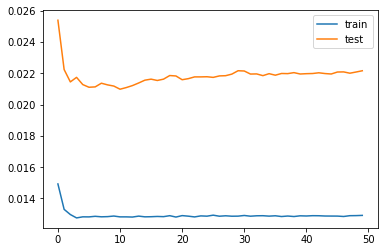

In [0]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:

from math import sqrt
from numpy import concatenate
print(test.shape)
test = test.reshape((test.shape[0], 1, test.shape[1]))
# make a prediction
yhat = model.predict(test)
print(yhat)
test = test.reshape((test.shape[0], test.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test[:, 1:]), axis=1)
inv=inv_yhat
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
testy = testy.reshape((len(testy), 1))
inv_y = concatenate((testy, test[:, 1:]), axis=1)
rmse = sqrt(mean_squared_error(inv_y, inv))
print('Test RMSE: %.3f' % rmse)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(173099, 5)
[[0.01268473]
 [0.01266048]
 [0.01266048]
 ...
 [0.01333328]
 [0.01334503]
 [0.01334203]]
Test RMSE: 0.018
Test RMSE: 4.113


In [0]:
print(invy.shape)

NameError: ignored

In [0]:
pyplot.plot(testy.shape[0], label='actual')
pyplot.plot(invy, label='predicted')
pyplot.legend()
pyplot.show()

In [0]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX)
print(trainY)

[[[0.58253361 1.         0.         0.         0.        ]]

 [[0.58253361 1.         0.         0.         0.        ]]

 [[0.5815739  1.         0.         0.         0.        ]]

 ...

 [[0.05662188 1.         0.         0.         0.        ]]

 [[0.05470249 1.         0.         0.         0.        ]]

 [[0.05470249 1.         0.         0.         0.        ]]]
[0.58253361 0.5815739  0.42898275 ... 0.05470249 0.05470249 0.05470249]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1,activation='relu',input_shape=(1,52454)))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=1000, verbose=0)

yhat = model.predict(X_test, verbose=0)
print(yhat)

ValueError: ignored